In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

### Load The dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

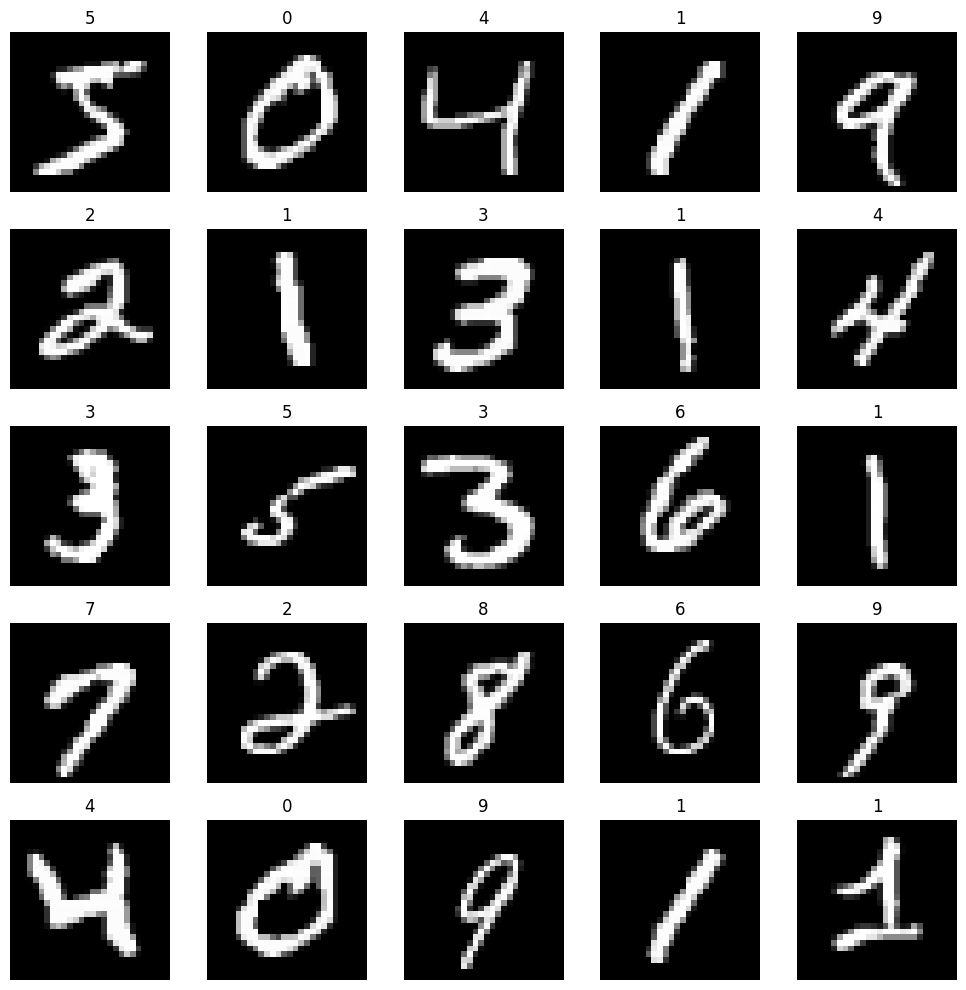

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'grey')
    ax.set_title(y_train[i])
    ax.axis('off');
plt.tight_layout()

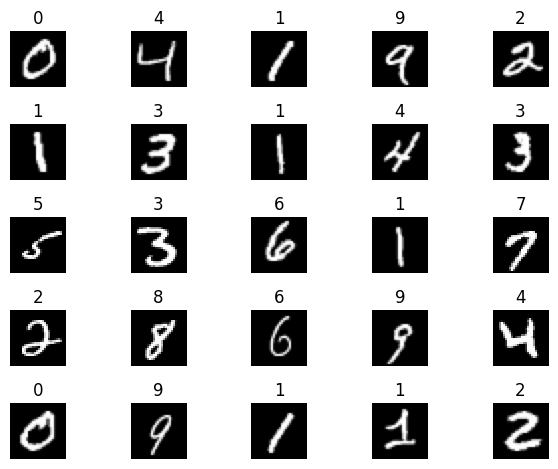

In [7]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()

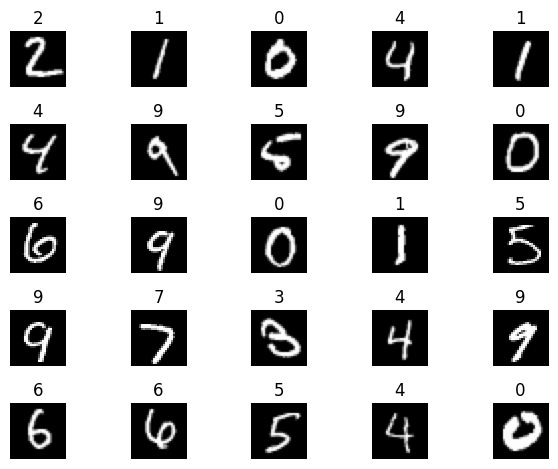

In [8]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(y_test[i])
    plt.axis('off')
plt.tight_layout()

In [9]:
# normalizing the data
X_train, X_test = X_train/255, X_test/255

### prepare the output variable

In [11]:
import seaborn as sns

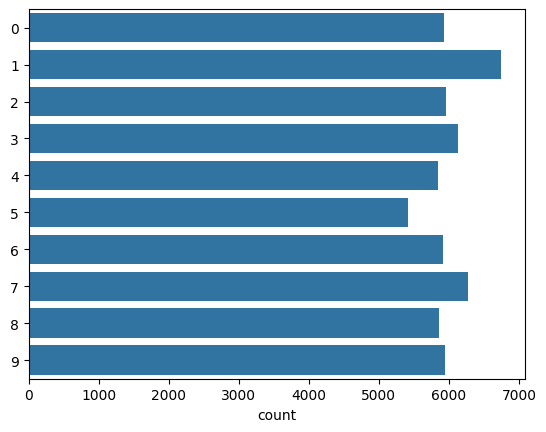

In [12]:
sns.countplot(y = y_train);

In [13]:
y_train.shape

(60000,)

In [14]:
y_train_new = tf.keras.utils.to_categorical(y_train)
y_test_new = tf.keras.utils.to_categorical(y_test)
y_test_new.shape, y_train_new.shape

((10000, 10), (60000, 10))

### build the model

In [16]:
import gc

In [17]:
# del model
# gc.collect()
# gc.collect()

In [18]:
model = tf.keras.Sequential([

    # input layers
    tf.keras.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    
    tf.keras.layers.Dense(128, activation = 'relu'),

    #output layer

    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [19]:
from tensorflow.keras.utils import plot_model

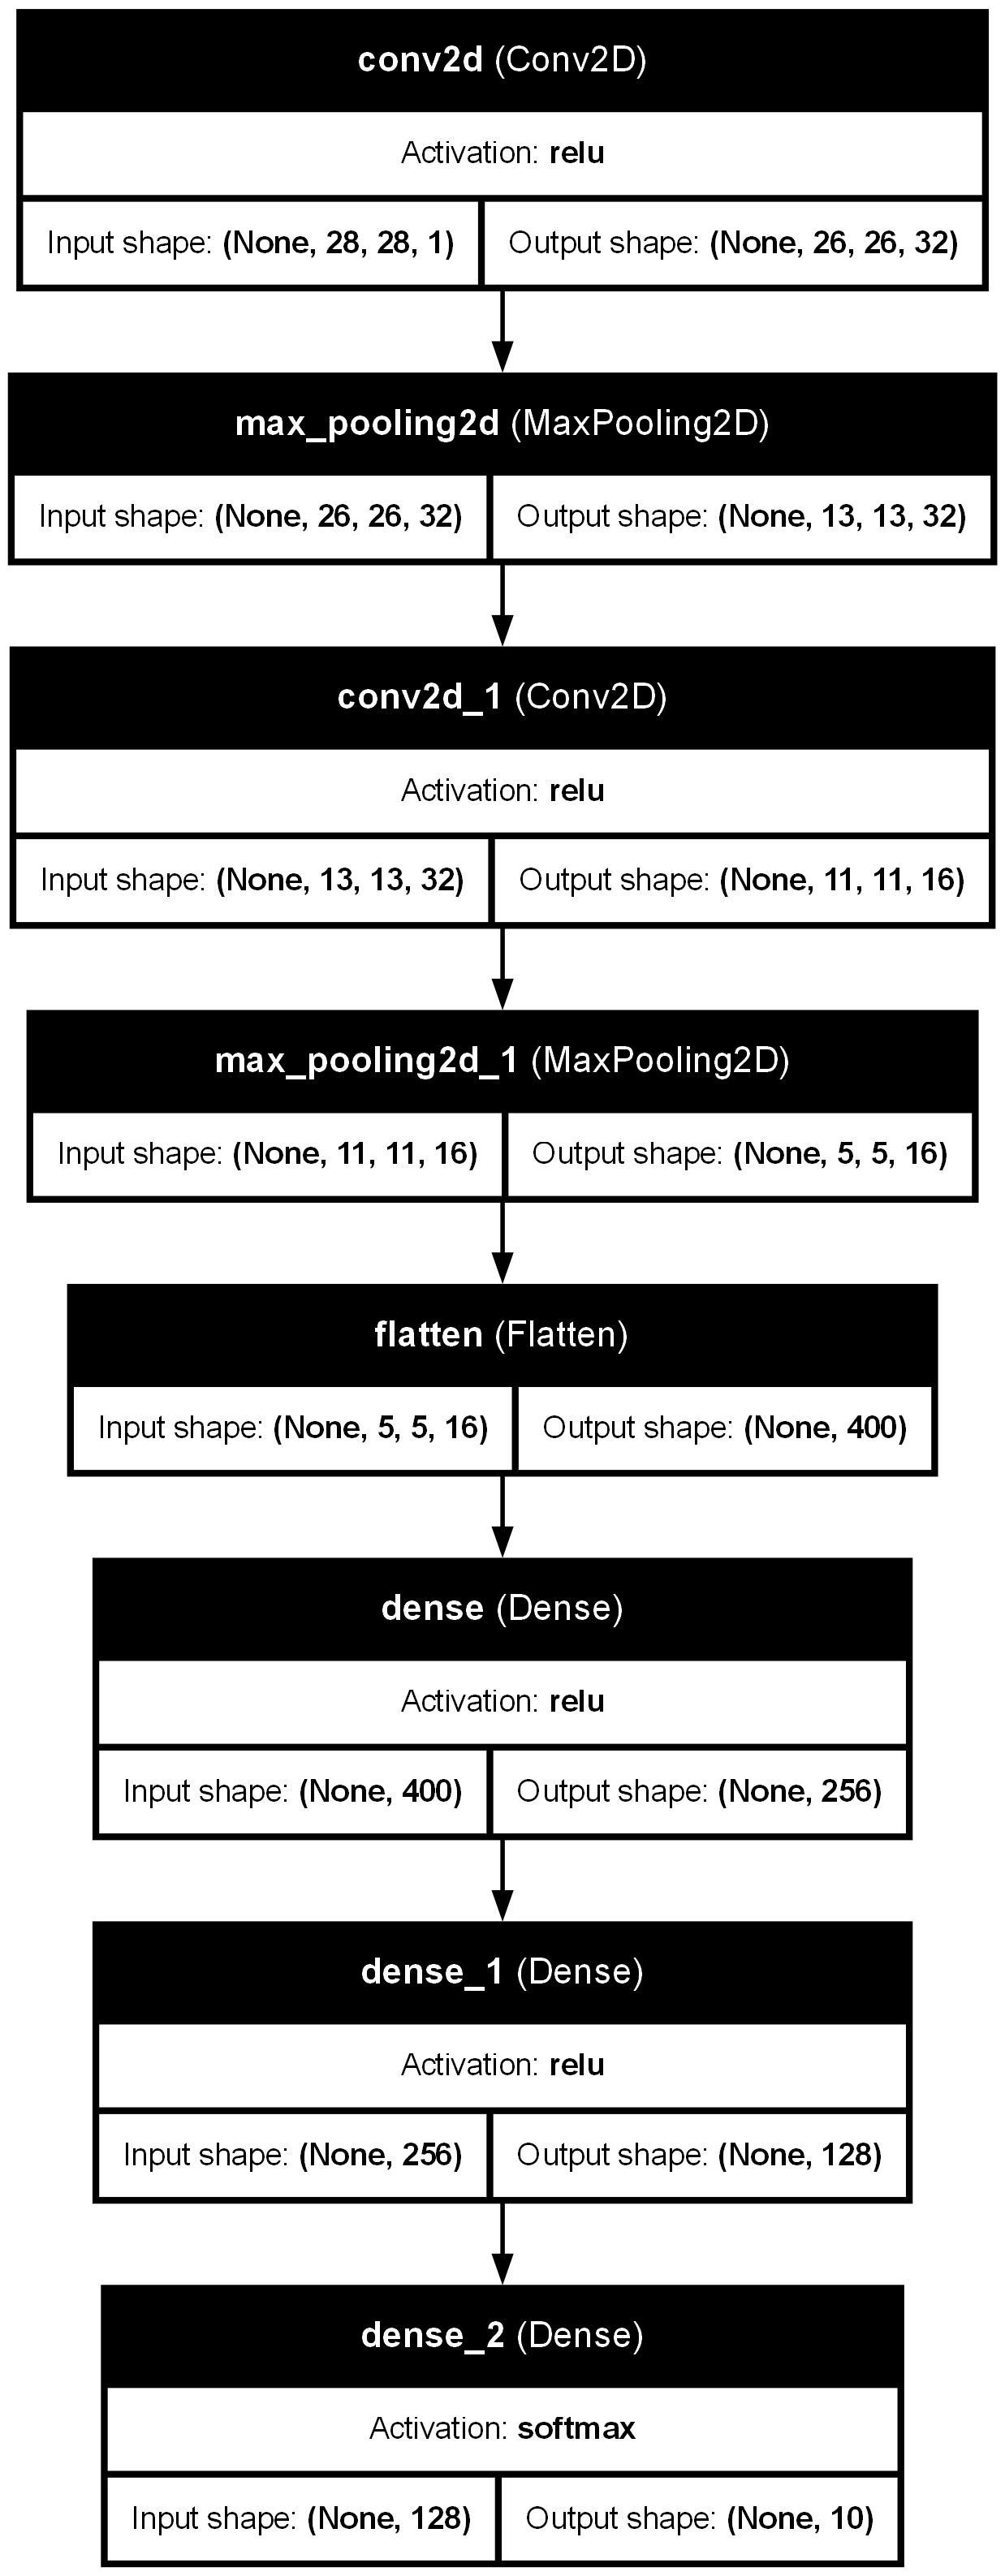

In [20]:
plot_model(model, show_layer_activations = True, show_shapes = True, show_layer_names= True)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,786 (553.85 KB)

 Trainable params: 141,786 (553.85 KB)

 Non-trainable params: 0 (0.00 B)

### compile the model

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model

In [25]:
model.fit(X_train, y_train_new, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9219 - loss: 0.2466
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9852 - loss: 0.0473
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9894 - loss: 0.0328
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9913 - loss: 0.0254
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9926 - loss: 0.0227
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9941 - loss: 0.0188
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9961 - loss: 0.0143
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9958 - loss: 0.0143
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9966 - loss: 0.0122


#### Evaluate the model

In [27]:
model.evaluate(X_test, y_test_new, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9871 - loss: 0.0684


[0.04789355397224426, 0.9908000230789185]

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

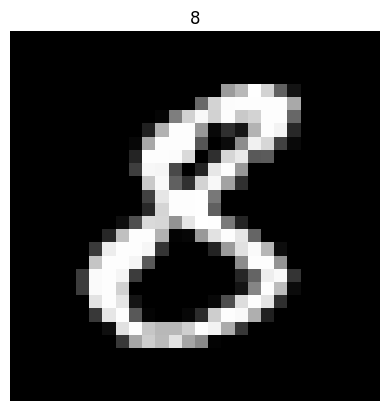

In [29]:
new = X_test[1234]
plt.imshow(new, cmap = 'grey')
plt.title(y_test[1234])
plt.axis('off');

In [30]:
new.shape

(28, 28)

In [31]:
new = new.reshape(1, 28,28, 1)
# new = new.reshape(1, 28,28)

In [32]:
new = new / 255
probs = model.predict(new, verbose = False)
print(probs.argmax())

8


In [33]:
import os
import cv2

In [34]:
im = cv2.imread(r"C:\Users\DAI.STUDENTSDC\Downloads\new-char.png", 0 )
im = cv2.resize(im, (28,28))

In [35]:
im.shape

(28, 28)

In [36]:
# im = np.resize(im, (28,28))

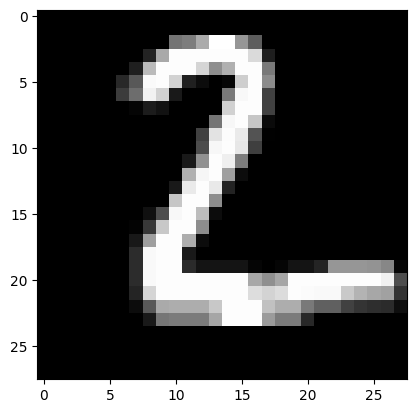

In [37]:
plt.imshow(im, cmap = 'grey')

In [38]:
im = im/255
im = im.reshape(-1, 28, 28, 1)

In [39]:
im.shape

(1, 28, 28, 1)

In [40]:
x = model.predict(im)
x.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


2

#### on manual data

In [42]:
im = cv2.imread(r"C:\Users\DAI.STUDENTSDC\Downloads\new-char1.jpg", 0 )

In [43]:
im = cv2.resize(im, (28,28))
im.shape

(28, 28)

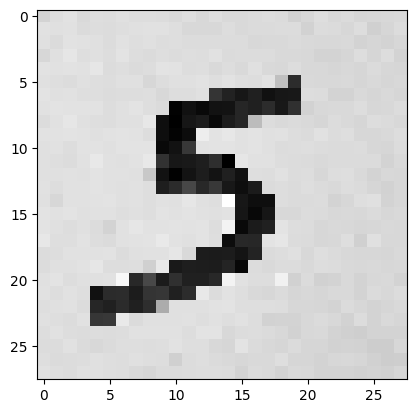

In [44]:
plt.imshow(im, cmap = 'grey')

In [45]:
im = 255 - im

In [46]:
im = im/255
im = im.reshape(1, 28, 28 , 1)

In [47]:
x = model.predict(im)
x.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


5

In [48]:
i = cv2.thresh

AttributeError: module 'cv2' has no attribute 'thresh'